# Ice Extent Prediction (AI)

**Objective:** Predict ice extent in the arctic given feature input for one instance using machine learning-based methods with statistical validation.

### 1 Import

Import necessary libraries, load necessary datasets

In [7]:
# Libraries
from IPython.display import Image
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import datascience as ds
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Data
# Class: 0 (x<5000000), 1 (5000000<x<7000000), 2 (7000000<x<9000000), 3 (9000000<x<11000000), 4 (11000000<x<13000000), 5 (x>13000000)
full_data = pd.read_csv("data/Arctic_domain_mean_1979_2018.csv")
X = np.array(full_data.iloc[:, 1:10])
y = np.array(full_data.iloc[:, 11])
new_y = []
for elmnt in y:
    if (elmnt < 5000000):
        new_y.append(0)
    elif (elmnt < 7000000):
        new_y.append(1)
    elif (elmnt < 9000000):
        new_y.append(2)
    elif (elmnt < 11000000):
        new_y.append(3)
    elif (elmnt < 13000000):
        new_y.append(4)
    elif (elmnt > 13000000):
        new_y.append(5)
y = np.array(new_y)

### 2 Split data

Split data into training (70%) and testing (30%)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

### 3 Standardize features

Standardize features by calculating standard distributions

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

### 4 Test various methods
| Method | Highest accuracy | Notes |
| - | - | - |
| K-NN | 0.865160848734 | Best k-value: 5 |
| SVM (RBF) |  | Best C-value |

#### K-NN

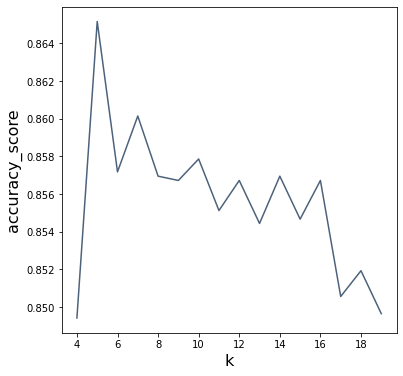

In [10]:
from sklearn.neighbors import KNeighborsClassifier

iteration_range = range(4, 20)
accuracy_scores = []
for i in iteration_range:
    knn = KNeighborsClassifier(n_neighbors=i, 
                               p=2,
                               metric='minkowski')

    knn.fit(X_train_std, y_train)

    y_pred = knn.predict(X_test_std)
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    
ds.Table().with_columns(
    "k", iteration_range,
    "accuracy_score", accuracy_scores
).plot("k", "accuracy_score")
plt.show()

In [11]:
max_score = max(accuracy_scores)
print("Best k-value: " + str(iteration_range[accuracy_scores.index(max_score)]))
print("Best performance: " + str(max_score))

Best k-value: 5
Best performance: 0.865160848734


#### SVM (RBF kernel)

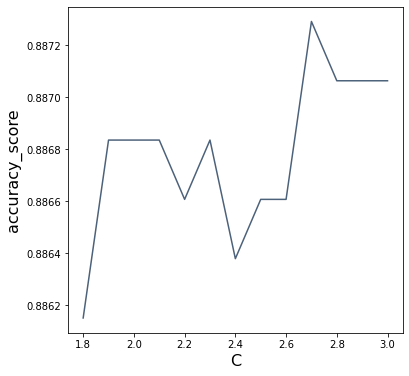

In [14]:
from sklearn.svm import SVC

iteration_range = np.array(range(18, 31)) / 10
accuracy_scores = []
for i in iteration_range:
    svm = SVC(kernel='rbf', random_state=1, C=i)
    svm.fit(X_train_std, y_train)

    y_pred = svm.predict(X_test_std)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

ds.Table().with_columns(
    "C", iteration_range,
    "accuracy_score", accuracy_scores
).plot("C", "accuracy_score")
plt.show()

In [15]:
max_score = max(accuracy_scores)
print("Best C-value: " + str(iteration_range[accuracy_scores.index(max_score)]))
print("Best performance: " + str(max_score))

Best C-value: 2.7
Best performance: 0.887291809263


### 5 Conclusion

**Result:** Using SVM (RBF kernel), 88.73% accuracy was attained in predicting sea ice extent in 2000000 m intervals.

**Notes:**
Although exposure to AI was gained from this project, this model would not serve much use as its accuracy and methodology is ineffective in predicting sea ice extent - a new model would need to be made with a method that better aligns with the objective of this project